<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>LSTM - Frozen Dessert Production</b></p>

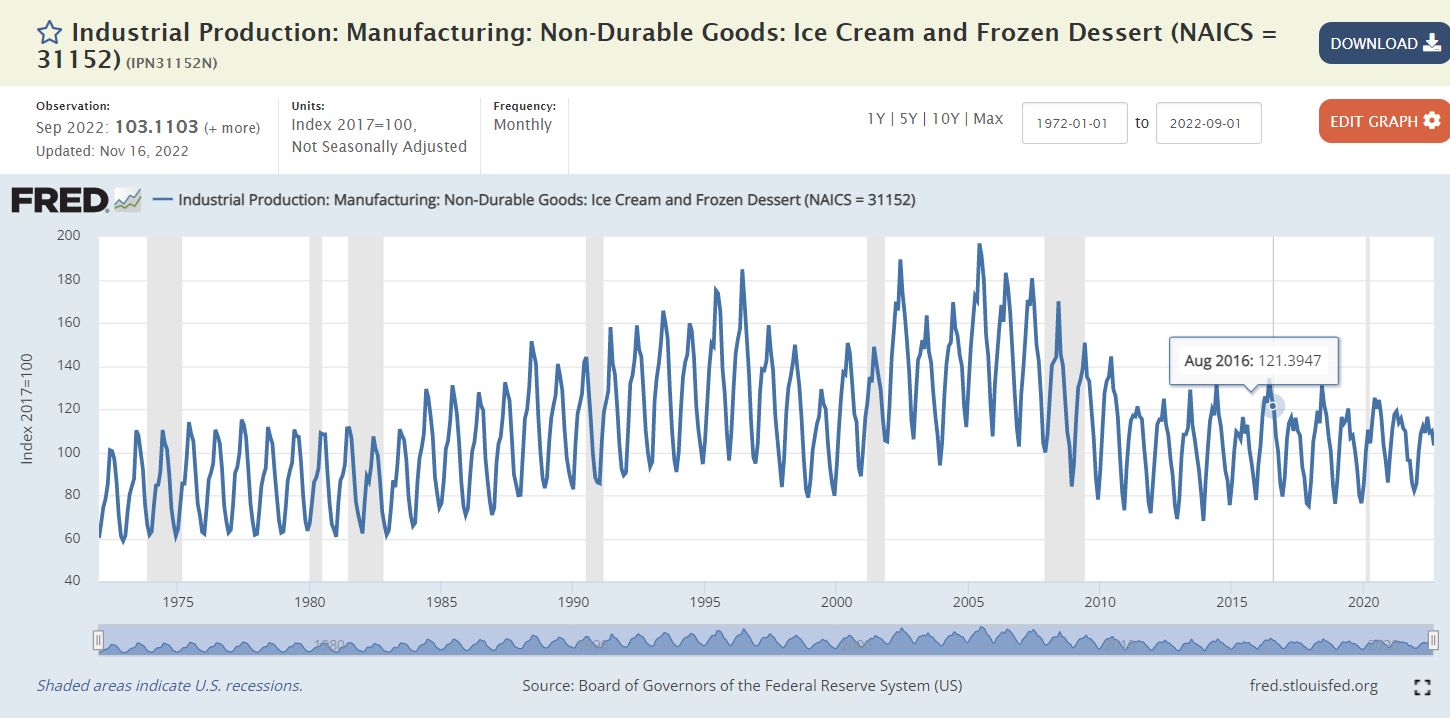

# <font color='orange'> <b>About Dataset</b><font color='black'>  

[Info about this data set](https://fred.stlouisfed.org/series/IPN31152N)

Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

---

This data represents the industrial production index for the manufacturing of "Ice Cream and Frozen Desserts" under the "31152" industry classification code in the United States, categorized under Non-Durable Goods Manufacturing.

The index measures the actual production of relevant businesses, aiming to reflect the economic performance of this sector. The index value is calculated based on a reference period set to 100 in the year 2017. No seasonal adjustment has been applied, meaning seasonal effects have not been removed from the data.

This data can be obtained from the Federal Reserve Bank's FRED database and is regularly updated by the Federal Reserve Bank.

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

In [45]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='observation_date',
                 parse_dates=True
                )

# <font color='orange'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>  

In [47]:
df.head()

,IPN31152N
observation_date,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.359
1972-05-01,85.032


In [48]:
df.tail()

,IPN31152N
observation_date,
2024-08-01,124.748
2024-09-01,111.072
2024-10-01,105.392
2024-11-01,91.460
2024-12-01,89.985


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 636 entries, 1972-01-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  636 non-null    float64
dtypes: float64(1)
memory usage: 9.9 KB


In [50]:
df.columns = ['Production']

In [51]:
df.head()

,Production
observation_date,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.359
1972-05-01,85.032


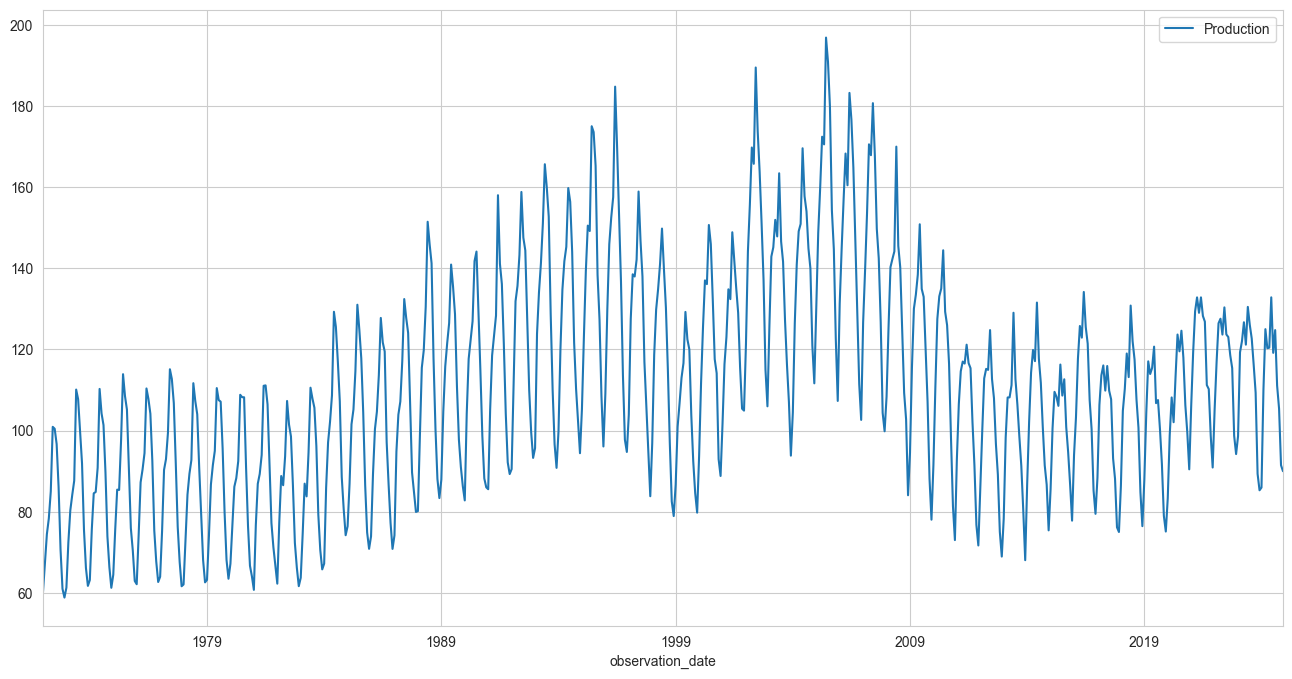

In [52]:
df.plot(figsize=(16,8));

# <font color='orange'> <b>Preprocessing of Data</b><font color='black'>  

## <font color='gold'> <b>Train | Test Split</b><font color='black'>  

In [55]:
len(df)

636

In [56]:
test_size = 24

In [57]:
test_ind = len(df)- test_size

In [58]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [59]:
len(train)

612

In [60]:
len(test)

24

In [61]:
train

,Production
observation_date,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.359
1972-05-01,85.032
...,...
2022-08-01,123.037
2022-09-01,118.544
2022-10-01,115.372


In [62]:
test

,Production
observation_date,
2023-01-01,98.632
2023-02-01,119.275
2023-03-01,122.017
2023-04-01,126.679
2023-05-01,121.161
2023-06-01,130.463
2023-07-01,126.057
2023-08-01,122.675
2023-09-01,116.218


## <font color='gold'> <b>Scaling</b><font color='black'>  

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

This code snippet is part of the data preprocessing step. It uses a scaler object to scale the training and test data.

The `fit_transform()` method applies the scaler to the training data, scaling and transforming it. While performing scaling on the training data, the scaler analyzes the data and learns statistical parameters to transform the values accordingly.

Later, the `transform()` method is used to apply the same scaler to the test data. In this case, the scaler utilizes the scaling factors learned from the training data to transform the test data. This ensures that both training and test data are scaled consistently.

This process helps normalize the data to the same range. Scaling can improve model performance and contribute to more stable results.

## <font color='gold'> <b>Time Series Generator</b><font color='black'>  

In [69]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

549-12=537

In [72]:
len(generator)

600

In [73]:
generator[0]

(array([[[0.00946788],
         [0.06107842],
         [0.11324343],
         [0.14143325],
         [0.18979603],
         [0.30491086],
         [0.30149567],
         [0.27411688],
         [0.19733743],
         [0.08531309],
         [0.01561334],
         [0.        ]]]),
 array([[0.01773913]]))

In [74]:
X, y = generator[0]

In [75]:
y.shape

(1, 1)

In [76]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00946788 0.06107842 0.11324343 0.14143325 0.18979603 0.30491086
 0.30149567 0.27411688 0.19733743 0.08531309 0.01561334 0.        ]
Predict this y: 
 [[0.01773913]]


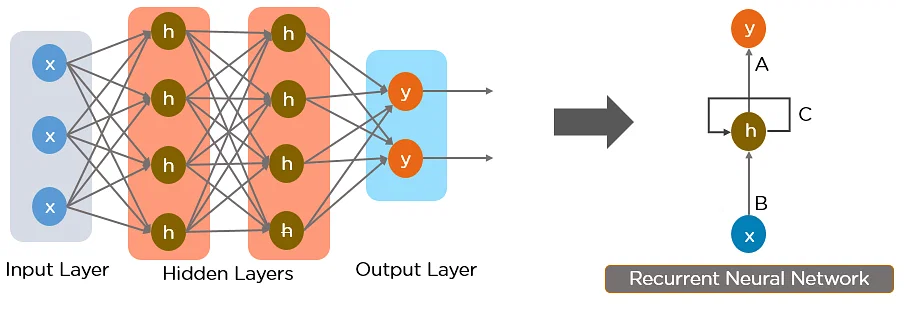

# <font color='orange'> <b>Modeling & Model Performance</b><font color='black'>  

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [80]:
train_scaled.shape

(612, 1)

In [81]:
n_features = train_scaled.shape[1]
n_features

1

## <font color='gold'> <b>with "tanh" activation function</b><font color='black'>  

In [83]:
# Creating an LSTM model
model = Sequential()

# First LSTM layer with 64 units, 'tanh' activation, and return_sequences=True
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(length, n_features)))

# Dropout layer added with a dropout rate of 0.2
model.add(Dropout(0.2))

# Second LSTM layer with 32 units and return_sequences=True
model.add(LSTM(32, activation='tanh', return_sequences=True))

# Dropout layer added with a dropout rate of 0.2
model.add(Dropout(0.2))

# Third LSTM layer with 16 units (return_sequences=False by default)
model.add(LSTM(16, activation='tanh'))

# Dropout layer added with a dropout rate of 0.2
model.add(Dropout(0.2))

# Output layer with a single neuron for regression
model.add(Dense(1))

# Compiling the model using Adam optimizer and Mean Squared Error (MSE) loss function
model.compile(optimizer='adam', loss='mse')

**LSTM (Long Short-Term Memory) Layer**

The LSTM (Long Short-Term Memory) layer is a type of artificial neural network layer used for analyzing sequential data structures such as time series or sequential inputs. One of the most important features of LSTM is its ability to retain past information in its hidden cells.

An LSTM layer is typically used to process sequential time steps. For example, in a time series forecasting task, the LSTM layer receives data at each time step and uses it along with information from previous time steps to predict the next step.

**`return_sequences=True`**

If `return_sequences=True` is set, the LSTM layer produces a full sequence output for each time step. This means that at each time step, an output vector is generated, and these outputs are sequentially passed to the next LSTM layer or the output layer. In this case, the LSTM layer is expected to generate an output for each time step, resulting in a complete time series output.

This feature is particularly useful when working with multiple LSTM layers, allowing deeper analysis of time series data and capturing more complex relationships. Additionally, these outputs can be directly connected to an output layer to make predictions.

In summary, the `return_sequences=True` setting enables the LSTM layer to produce a complete time series output for each time step, allowing it to model sequential dependencies more effectively.

---

**`return_sequences=False`**

If `return_sequences=False` is set, the LSTM layer produces an output only at the last time step. In other words, the LSTM layer only returns the output from the final time step.

In this case, the LSTM layer provides only a summary of the last time step. Instead of retaining and using information from previous time steps, it relies solely on the information from the last time step for making predictions.

Practically, this can make it more challenging to model long-term dependencies and relationships in sequential data. Capturing dynamic patterns or long-term trends in time series often requires the LSTM layer to access and utilize information from previous time steps.

However, in some scenarios, using only the last time step's output may be sufficient. For example, `return_sequences=False` can be useful when predicting only the final step in a time series or when the LSTM layer is connected to another layer as part of a more complex model.

In summary, the `return_sequences=False` setting ensures that the LSTM layer produces an output only at the last time step, limiting access to information from previous steps. This can impose limitations when modeling long-term dependencies and dynamic patterns in time series analysis.

In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

### <font color='gold'> <b>EarlyStopping and Validation Generator</b><font color='black'>  

In [87]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

**`restore_best_weights=True` Parameter**

The `restore_best_weights=True` parameter ensures that the model restores the best-performing weights at the end of the EarlyStopping process.

**EarlyStopping** is a stopping technique used during model training. By monitoring a specific metric (usually validation loss), it automatically halts training if the metric does not improve for a defined number of epochs. This strategy helps prevent **overfitting** and improves the model’s generalization.

When `restore_best_weights=True` is set, the model reverts to the weights that achieved the best validation performance once EarlyStopping is triggered. In other words, when training stops, the weights corresponding to the lowest validation loss are restored.

This feature ensures that even if training is stopped early, the best-performing model weights are preserved. As a result, predictions and evaluations can be made using the optimal version of the model.

**Why Use `restore_best_weights=True`?**

Using `restore_best_weights=True` is generally recommended when training models with EarlyStopping to ensure the best possible performance.

In [89]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [90]:
model.fit(generator,
            epochs = 20,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0380 - val_loss: 0.0091
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0185 - val_loss: 0.0143
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0144 - val_loss: 0.0045
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0107 - val_loss: 0.0035
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0087 - val_loss: 0.0046
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0082 - val_loss: 0.0031
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0066 - val_loss: 0.0033
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

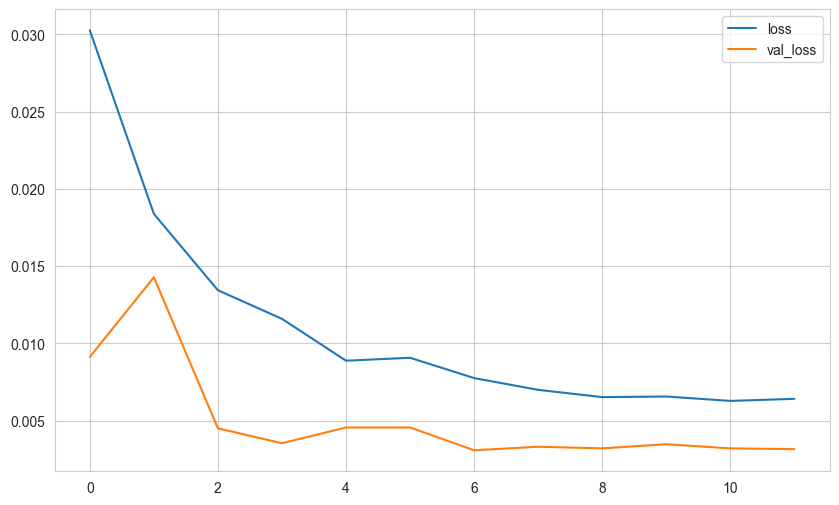

In [91]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### <font color='gold'> <b>Evaluation on Test Data</b><font color='black'>  

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [95]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


**Explanation of the Code Block**

This code block contains a loop used for making predictions after the model has been trained. Below is a step-by-step explanation of what the code does:

1. **Initialize an Empty List:**  
   A list named `predictions_scaled` is defined. This list will store the scaled prediction values.

2. **Select Initial Evaluation Batch:**  
   `first_eval_batch` is created by slicing the last `length` elements from the training dataset. This serves as the starting point for making predictions. The last `length` rows of `train_scaled` are taken as the initial input for the model to start predicting.

3. **Reshape the Initial Batch:**  
   The `current_batch` variable is reshaped from `first_eval_batch`. This represents the current input that will be used for prediction and will be updated in each iteration of the loop.

4. **Start the Prediction Loop:**  
   A loop is initiated, running for `length` steps.

   - Inside the loop, the model makes a prediction using the current input by calling `model.predict()` on `current_batch`. The result is stored in the `current_pred` variable. This prediction is in a **scaled** form.
   
   - The predicted value (`current_pred`) is appended to the `predictions_scaled` list. This ensures that each prediction made in the loop is stored.

   - **Update the Current Batch:**  
     The predicted value is added to `current_batch`, and the first value is removed. This sliding window approach ensures that the sequence of predictions remains continuous and that newly predicted values are fed back into the model.

**Summary**

This code block allows the model to make sequential predictions based on the last available training data. The predictions are stored in `predictions_scaled` and can later be **inverse-transformed** to their original scale. By using this approach, the model demonstrates its ability to generate sequential predictions over time.

In [97]:
current_pred

array([[0.33124542]], dtype=float32)

In [98]:
current_batch

array([[[0.37347394],
        [0.41526577],
        [0.44677103],
        [0.46833828],
        [0.49167722],
        [0.51592195],
        [0.50396687],
        [0.48073187],
        [0.42937008],
        [0.37005374],
        [0.32032406],
        [0.33124542]]])

**Why Do `current_batch` and `predictions_scaled` Initially Contain the Same Value?**

It appears that `current_batch` and the `predictions_scaled` list initially contain the same value. The reason for this is that the first prediction is made using the initial input, `first_eval_batch`, which serves as the starting input for the model. Once the first prediction is assigned to the `current_pred` variable, it is then appended to the `predictions_scaled` list.

After this, the loop continues, making predictions on `current_batch` and updating the predicted value as `current_pred`. However, when `current_batch` is updated, the previous prediction is added to the end of the new `current_batch`, while the first value is removed. This means that, at each iteration of the loop, the previous prediction becomes part of `current_batch`.

As a result, `current_batch` and `predictions_scaled` initially contain the same value, but as the loop progresses, `current_batch` is continuously updated with new predicted values, while `predictions_scaled` stores the predicted values sequentially.

This process reflects the logic behind making sequential predictions. Each prediction is appended to `current_batch` to be used as input for the next prediction. This approach enables the model to generate sequential predictions over time.

In [100]:
predictions_scaled

[array([0.37347394], dtype=float32),
 array([0.41526577], dtype=float32),
 array([0.44677103], dtype=float32),
 array([0.46833828], dtype=float32),
 array([0.49167722], dtype=float32),
 array([0.51592195], dtype=float32),
 array([0.50396687], dtype=float32),
 array([0.48073187], dtype=float32),
 array([0.42937008], dtype=float32),
 array([0.37005374], dtype=float32),
 array([0.32032406], dtype=float32),
 array([0.33124542], dtype=float32)]

In [101]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.03975054751503112 
mse: 0.003351035701847195 
rmse: 0.05788813092376705


### <font color='gold'> <b>Inverse Transformation and Comparing</b><font color='black'>  

Predictions made with a Recurrent Neural Network (RNN) are typically transformed back to the original data scale using a process called **Inverse Transformations**. This is necessary because predictions are initially scaled values.

The predicted values are stored in a list called `predictions_scaled`. These predictions are in a scaled format, meaning they have been transformed using a scaling process. To obtain the actual values, the scaling process needs to be reversed.

The `scaler.inverse_transform` function is used to revert the scaling process and obtain the real-scale predictions. This function applies an inverse transformation, converting the scaled predictions back to their original values.

As a result, the `scaler.inverse_transform` function is applied to the `predictions_scaled` list, and the final transformed values are stored in a new variable called `predictions`. This allows the predictions to be used for comparison and evaluation in their true data scale.

In [104]:
predictions = scaler.inverse_transform(predictions_scaled)

In [105]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
observation_date,,
2023-01-01,98.632,110.374
2023-02-01,119.275,116.141
2023-03-01,122.017,120.487
2023-04-01,126.679,123.463
2023-05-01,121.161,126.683
2023-06-01,130.463,130.028
2023-07-01,126.057,128.379
2023-08-01,122.675,125.173
2023-09-01,116.218,118.087


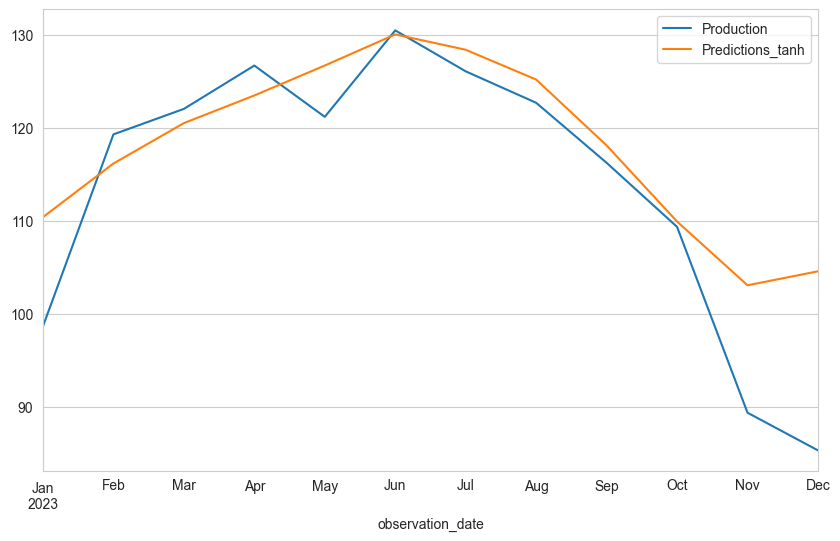

In [106]:
compare.plot();

In [107]:
eval_metrics(compare.Production, compare.Predictions_tanh)


mae: 5.484454591634372 
mse: 63.791044789781004 
rmse: 7.9869296221878034


## <font color='gold'> <b>with "relu" activation function</b><font color='black'>  

In [109]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 12, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 12, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [112]:
model.fit(generator,
            epochs = 20,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0537 - val_loss: 0.0081
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0161 - val_loss: 0.0041
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0073 - val_loss: 0.0049
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0074 - val_loss: 0.0116
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0065 - val_loss: 0.0108
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0056 - val_loss: 0.0026
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

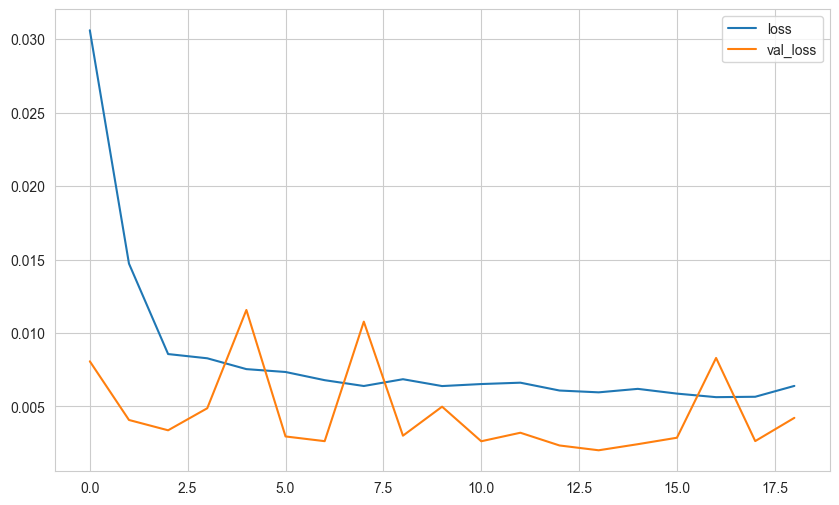

In [113]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### <font color='gold'> <b>Evaluation on Test Data</b><font color='black'>  

In [115]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


### <font color='gold'> <b>Inverse Transformation and Comparing</b><font color='black'>  

In [117]:
predictions = scaler.inverse_transform(predictions_scaled)

In [118]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
observation_date,,,
2023-01-01,98.632,110.374,105.776
2023-02-01,119.275,116.141,116.978
2023-03-01,122.017,120.487,123.790
2023-04-01,126.679,123.463,123.769
2023-05-01,121.161,126.683,124.338
2023-06-01,130.463,130.028,127.350
2023-07-01,126.057,128.379,123.792
2023-08-01,122.675,125.173,122.526
2023-09-01,116.218,118.087,118.785


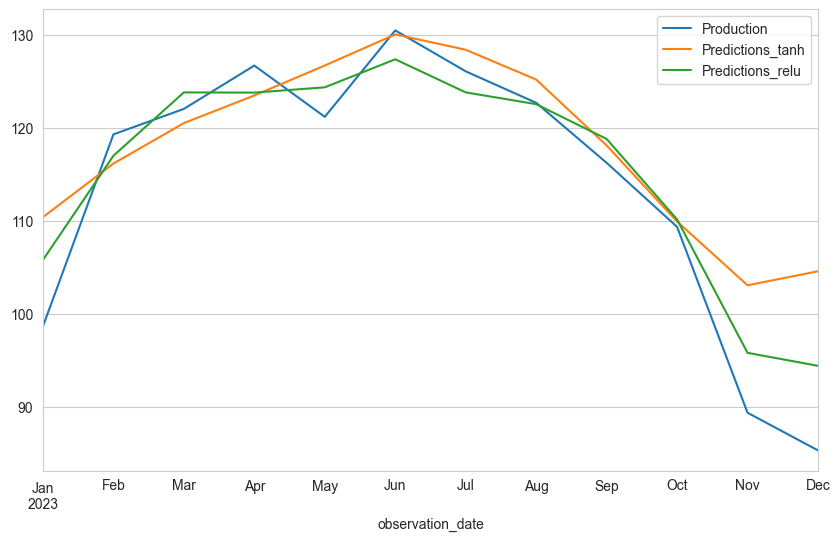

In [119]:
compare.plot();

In [120]:
eval_metrics(compare.Production, compare.Predictions_relu)


mae: 3.4776365512326364 
mse: 18.693679164099517 
rmse: 4.323618757950279


# <font color='orange'> <b>Retrain and Forecasting - Create Final Model with Full Data</b><font color='black'>  

In [122]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [123]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [124]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(generator, epochs=20)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0471
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0136
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0085
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0067
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0071
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0067
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0056
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0077
Epoch 9/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0070
Epoch 10/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0064
Epoch 11/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0065
Epoch 12/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0056
Epoch 13/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0057
Epoch 14/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0066
Epoch 15/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - lo

In [125]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [126]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 87.86399699],
       [107.62324601],
       [115.74551672],
       [115.73301249],
       [120.32776708],
       [125.02161386],
       [120.70170145],
       [120.69267999],
       [110.30012105],
       [100.6493165 ],
       [ 87.97256708],
       [ 85.51071458]])

In [127]:
model.get_weights()

[array([[ 1.08032987e-01,  1.14263698e-01, -9.54182968e-02,
         -4.55557965e-02, -2.47751176e-01,  1.51760861e-01,
          1.15325190e-01, -1.18002579e-01, -5.70277795e-02,
          1.20537937e-01,  1.19167909e-01,  2.23386481e-01,
          2.50916108e-02,  1.24435097e-01, -8.24616104e-02,
         -8.96145254e-02, -9.47002769e-02,  2.90794492e-01,
         -2.89639235e-01,  2.63280928e-01,  5.55710457e-02,
          9.12238434e-02,  2.65708417e-02, -6.11540303e-02,
          2.78011501e-01, -5.96673526e-02,  4.42552119e-02,
         -3.36092934e-02,  5.96591048e-02, -1.80992305e-01,
          3.97120148e-01, -1.95683707e-02,  8.62303823e-02,
          2.31322855e-01, -8.18515867e-02,  1.28116980e-02,
          1.76064689e-02, -5.04698120e-02, -1.01757478e-02,
         -1.65860653e-01,  4.82302383e-02, -1.44100701e-02,
          3.61124128e-02,  7.07982183e-02, -1.61767304e-02,
          1.27991915e-01,  2.51329333e-01, -8.40557665e-02,
          3.91001515e-02, -1.21886730e-0

In [128]:
df

,Production
observation_date,
1972-01-01,60.152
1972-02-01,67.273
1972-03-01,74.470
1972-04-01,78.359
1972-05-01,85.032
...,...
2024-08-01,124.748
2024-09-01,111.072
2024-10-01,105.392


In [192]:
forecast_index = pd.date_range(start = '2025-01-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')

[StackOverflow Link](https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags)

In [194]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2025-01-01,87.864
2025-02-01,107.623
2025-03-01,115.746
2025-04-01,115.733
2025-05-01,120.328
2025-06-01,125.022
2025-07-01,120.702
2025-08-01,120.693
2025-09-01,110.300
2025-10-01,100.649


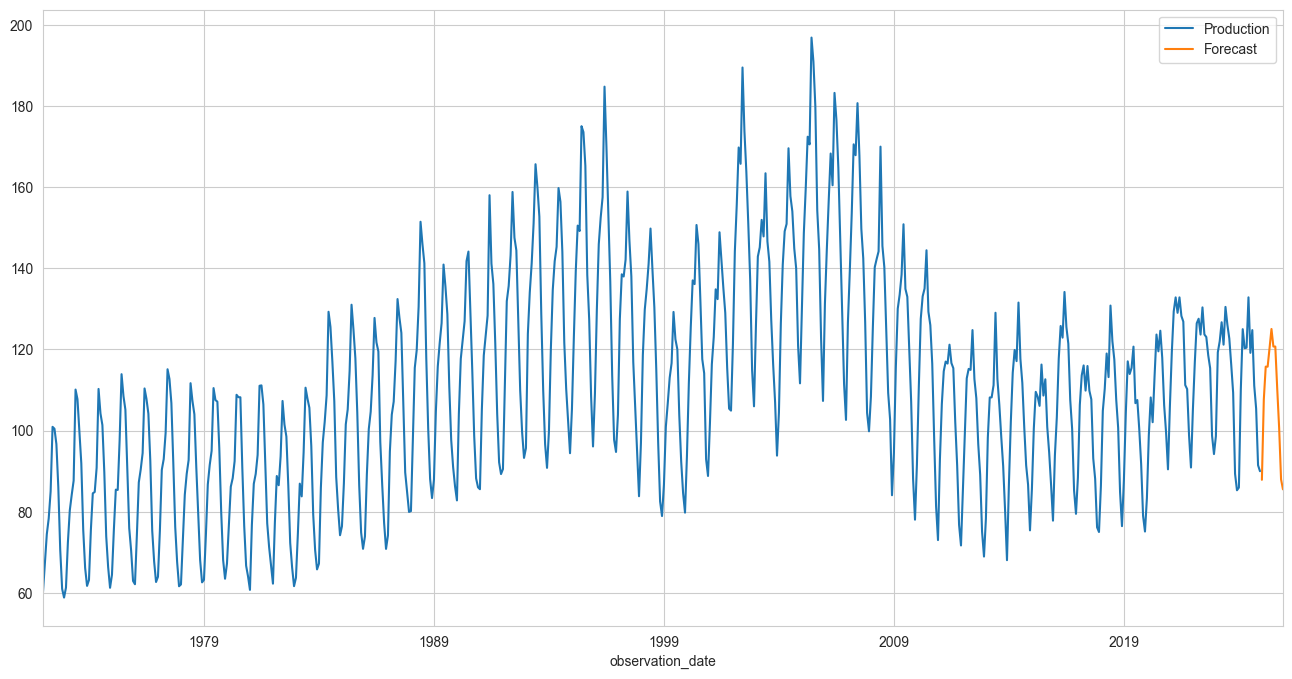

In [196]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(636.0, 680.0)

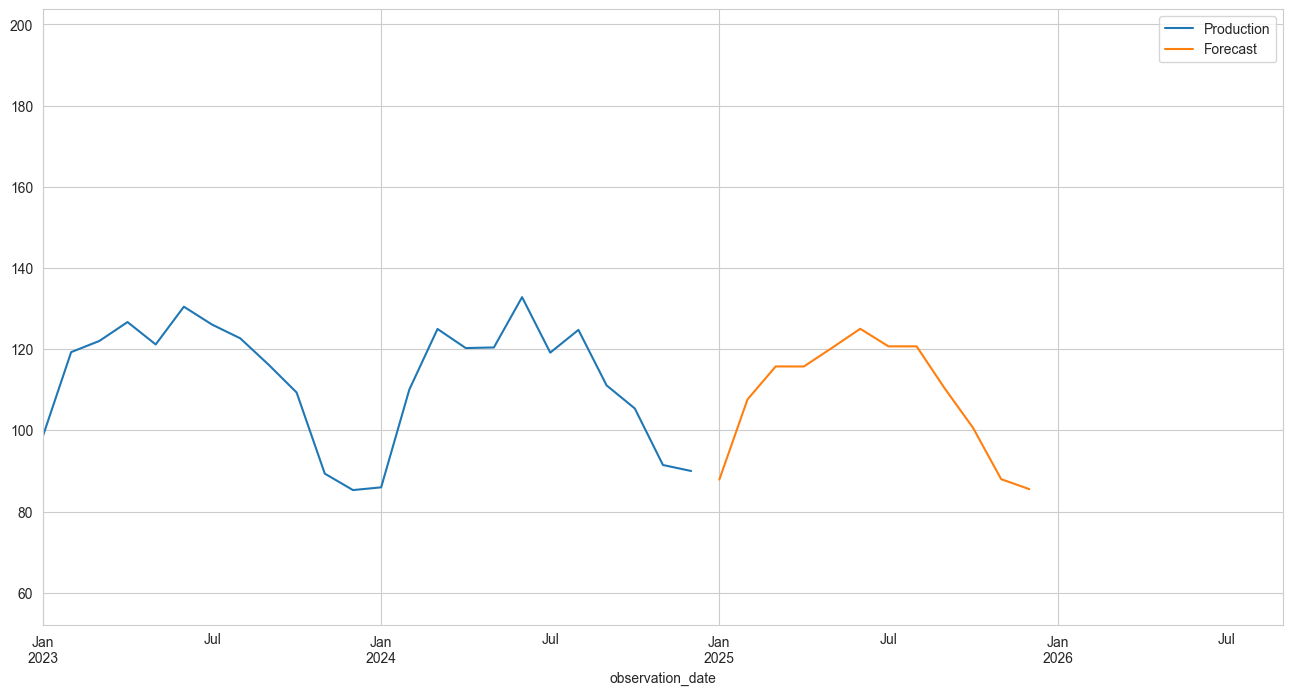

In [200]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2023-01-01', '2026-09-01')

In [202]:
from keras.models import load_model

# Saving model
model.save('final_model.keras')

<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>